In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [46]:
Ar = pd.read_csv('plasma/Ar_4.csv', index_col='Time')
N2 = pd.read_csv('plasma/N2_p.csv', index_col='Time')
NH3 = pd.read_csv('plasma/NH3_p.csv', index_col='Time')

Ar_6 = pd.read_csv('plasma/Ar_6_2.csv', index_col='Time')
O2 = pd.read_csv('plasma/O2.csv', index_col='Time')

Ar.head()

,49.751256,50.252262,50.753331,51.254464,51.755659,52.256918,52.758239,53.259624,53.761071,54.262582,...,1186.378766,1186.985666,1187.592607,1188.199588,1188.806610,1189.413673,1190.020777,1190.627921,1191.235106,1191.842332
Time,,,,,,,,,,,,,,,,,,,,,
0.000,-34.0,-24.0,12.0,12.0,14.0,39.0,-2.0,-15.0,1.0,-17.0,...,-13.0,-5.0,-11.0,-5.0,3.0,60.0,1.0,-34.0,-26.0,-11.0
0.604,-40.0,-24.0,1.0,15.0,6.0,46.0,11.0,-10.0,-4.0,-39.0,...,-37.0,8.0,-15.0,11.0,-1.0,42.0,2.0,-18.0,-28.0,-14.0
1.202,-47.0,-31.0,12.0,4.0,10.0,40.0,-6.0,6.0,-6.0,-33.0,...,-26.0,-8.0,-15.0,8.0,-7.0,45.0,4.0,-36.0,-16.0,-20.0
1.803,-36.0,-19.0,11.0,-8.0,20.0,50.0,-1.0,3.0,-2.0,-26.0,...,-19.0,6.0,-25.0,6.0,-18.0,59.0,-12.0,-34.0,-24.0,-9.0
2.405,-34.0,-15.0,7.0,4.0,6.0,30.0,-9.0,-2.0,8.0,-14.0,...,-23.0,-4.0,-21.0,-1.0,7.0,43.0,9.0,-20.0,-26.0,4.0


In [47]:
# preprocessing
# row
Ar.index = [0.5*i for i in range(len(Ar.index))]
N2.index = [0.5*i for i in range(len(N2.index))]
NH3.index = [0.5*i for i in range(len(NH3.index))]
Ar_6.index = [0.5*i for i in range(len(Ar_6.index))]
O2.index = [0.5*i for i in range(len(O2.index))]

# column
# preprocessing for N2 and NH3
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

new_col = [str(DropFromSecond(x)) for x in Ar.columns.astype(float)]
Ar.columns = new_col
N2.columns = new_col
NH3.columns = new_col
Ar_6.columns = new_col
O2.columns = new_col

# value; replace negative values with zero and average others out
for i in range(len(Ar.index)):
    for j in range(len(Ar.columns)):
        if Ar.iloc[i,j]<0:
            Ar.iloc[i,j]=0

for i in range(len(N2.index)):
    for j in range(len(N2.columns)):
        if N2.iloc[i,j]<0:
            N2.iloc[i,j]=0

for i in range(len(NH3.index)):
    for j in range(len(NH3.columns)):
        if NH3.iloc[i,j]<0:
            NH3.iloc[i,j]=0

for i in range(len(Ar_6.index)):
    for j in range(len(Ar_6.columns)):
        if Ar_6.iloc[i,j]<0:
            Ar_6.iloc[i,j]=0

for i in range(len(O2.index)):
    for j in range(len(O2.columns)):
        if O2.iloc[i,j]<0:
            O2.iloc[i,j]=0
            
Ar.head()

,49.75,50.25,50.75,51.25,51.75,52.25,52.75,53.25,53.76,54.26,...,1186.37,1186.98,1187.59,1188.19,1188.8,1189.41,1190.02,1190.62,1191.23,1191.84
0.0,0.0,0.0,12.0,12.0,14.0,39.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,60.0,1.0,0.0,0.0,0.0
0.5,0.0,0.0,1.0,15.0,6.0,46.0,11.0,0.0,0.0,0.0,...,0.0,8.0,0.0,11.0,0.0,42.0,2.0,0.0,0.0,0.0
1.0,0.0,0.0,12.0,4.0,10.0,40.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,45.0,4.0,0.0,0.0,0.0
1.5,0.0,0.0,11.0,0.0,20.0,50.0,0.0,3.0,0.0,0.0,...,0.0,6.0,0.0,6.0,0.0,59.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,7.0,4.0,6.0,30.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,7.0,43.0,9.0,0.0,0.0,4.0


In [48]:
# average out
Ar = Ar.mean()
N2 = N2.mean()
NH3 = NH3.mean()
Ar_6 = Ar_6.mean()
O2 = O2.mean()

In [49]:
# random color generator
import random
random.seed(88)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

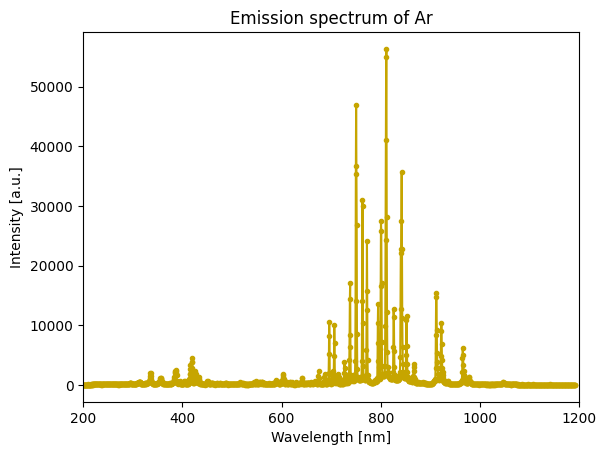

In [54]:
Ar.index = [float(x) for x in Ar.index.tolist()]
plt.plot(Ar.index.tolist(), Ar.values, '.-', color=colors[0])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of Ar')
plt.xlim(200,1200)
plt.savefig('file/plasma/Ar.png')
plt.show()

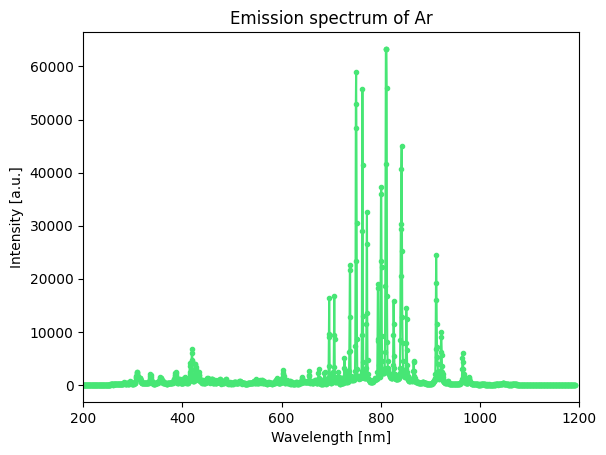

In [56]:
Ar_6.index = [float(x) for x in Ar_6.index.tolist()]
plt.plot(Ar_6.index.tolist(), Ar_6.values, '.-', color=colors[4])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of Ar')
plt.xlim(200,1200)
plt.savefig('file/plasma/Ar.png')
plt.show()

In [32]:
# interactive plot
import plotly.graph_objects as go

x = [float(i) for i in Ar.index.tolist()]
y = Ar.values
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Emission spectrum of Ar')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
my_color = colors[0]
scatter.line.color = my_color
scatter.marker.color = [my_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [my_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = 'black'
        s[i] = 5
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#C6A500'},
              'marker': {'color': [#C6A500, #C6A500, #C6A500, ..., #C6A500,
                                   #C6A500, #C6A500],
                         'line': {'color': [#C6A500, #C6A500, #C6A500, ...,
                                            #C6A500, #C6A500, #C6A500],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '48eef561-8156-42de-acd3-c9ec377ac217',
              'x': [49.75, 50.25, 50.75, ..., 1190.62, 1191.23, 1191.84],
              'y': array([0.        , 0.        , 9.95041322, ..., 0.01652893, 0.        ,
                          1.2892562 ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Emission spectrum of Ar'},
               'xaxis

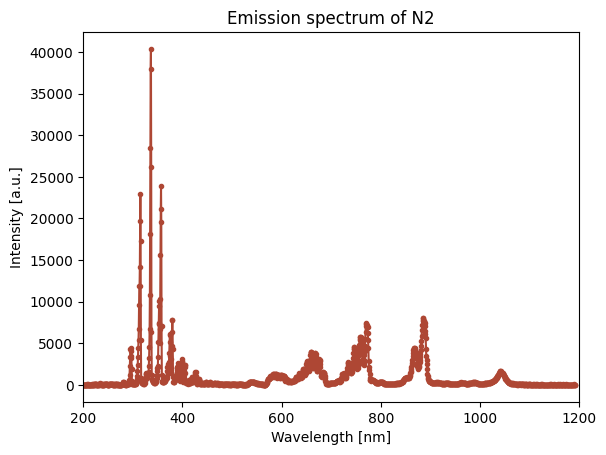

In [33]:
N2.index = [float(x) for x in N2.index.tolist()]
plt.plot(N2.index.tolist(), N2.values, '.-', color=colors[1])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of N2')
plt.xlim(200,1200)
plt.savefig('file/plasma/N2+Ar.png')
plt.show()

In [18]:
# interactive plot
import plotly.graph_objects as go

x = [float(i) for i in N2.index.tolist()]
y = N2.values
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Emission spectrum of N2+Ar')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
my_color = colors[0]
scatter.line.color = my_color
scatter.marker.color = [my_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [my_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#C6A500'},
              'marker': {'color': [#C6A500, #C6A500, #C6A500, ..., #C6A500,
                                   #C6A500, #C6A500],
                         'line': {'color': [#C6A500, #C6A500, #C6A500, ...,
                                            #C6A500, #C6A500, #C6A500],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '605cba9c-21bd-44cd-8872-33fe2e6c98e5',
              'x': [49.75, 50.25, 50.75, ..., 1190.62, 1191.23, 1191.84],
              'y': array([0.        , 0.        , 9.80869565, ..., 0.        , 0.        ,
                          0.7826087 ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Emission spectrum of N2+Ar'},
               'xa

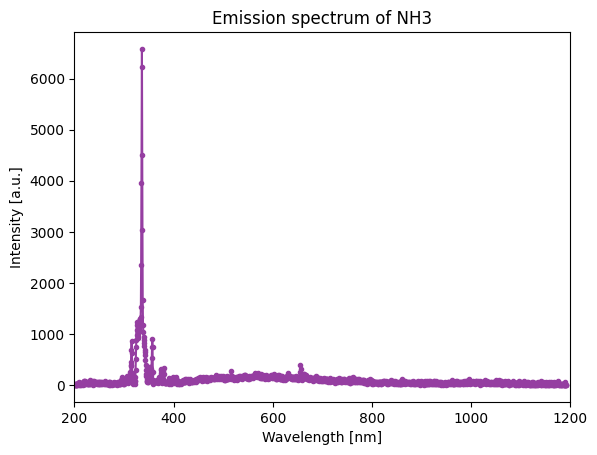

In [34]:
NH3.index = [float(x) for x in NH3.index.tolist()]
plt.plot(NH3.index.tolist(), NH3.values, '.-',color=colors[3])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of NH3')
plt.xlim(200,1200)
# plt.axvline(x = 201.1, color = 'black', linestyle=':', label = 'axvline - full height')
# plt.axvline(x = 204.6, color = 'black', linestyle=':', label = 'axvline - full height')
# plt.axvline(x = 791.9, color = 'black', linestyle=':', label = 'axvline - full height')
plt.savefig('file/plasma/NH3+Ar+ref.png')
plt.show()

In [20]:
# interactive plot
import plotly.graph_objects as go

x = [float(i) for i in NH3.index.tolist()]
y = NH3.values
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,y.max()], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Emission spectrum of N2+Ar')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
my_color = colors[0]
scatter.line.color = my_color
scatter.marker.color = [my_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [my_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#C6A500'},
              'marker': {'color': [#C6A500, #C6A500, #C6A500, ..., #C6A500,
                                   #C6A500, #C6A500],
                         'line': {'color': [#C6A500, #C6A500, #C6A500, ...,
                                            #C6A500, #C6A500, #C6A500],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'fb2ba4d4-6b00-4cba-9a1d-251967583de5',
              'x': [49.75, 50.25, 50.75, ..., 1190.62, 1191.23, 1191.84],
              'y': array([ 0.        ,  0.        , 10.72727273, ...,  0.        ,  0.        ,
                           0.53636364])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Emission spectrum of N2+Ar'},
            

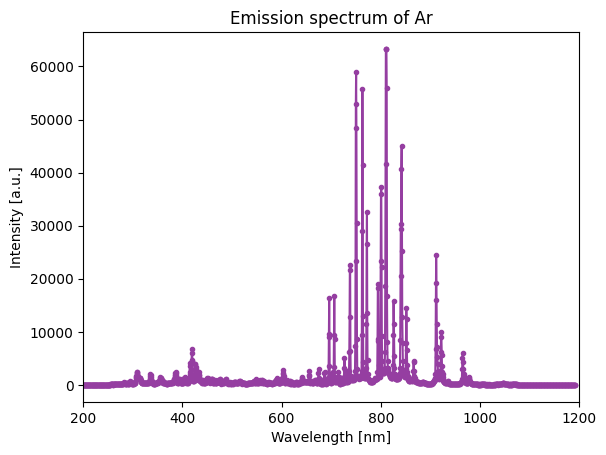

In [51]:
Ar_6.index = [float(x) for x in Ar_6.index.tolist()]
plt.plot(Ar_6.index.tolist(), Ar_6.values, '.-',color=colors[3])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of Ar')
plt.xlim(200,1200)
# plt.axvline(x = 201.1, color = 'black', linestyle=':', label = 'axvline - full height')
# plt.axvline(x = 204.6, color = 'black', linestyle=':', label = 'axvline - full height')
# plt.axvline(x = 791.9, color = 'black', linestyle=':', label = 'axvline - full height')
# plt.savefig('file/plasma/NH3+Ar+ref.png')
plt.show()

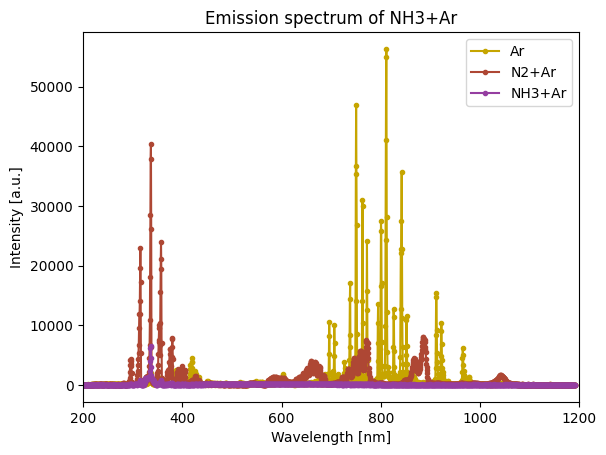

In [28]:
plt.plot(Ar.index.tolist(), Ar.values, '.-', color=colors[0])
plt.plot(N2.index.tolist(), N2.values, '.-', color=colors[1])
plt.plot(NH3.index.tolist(), NH3.values, '.-',color=colors[3])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of NH3+Ar')
plt.xlim(200,1200)
plt.legend(['Ar','N2+Ar','NH3+Ar'])
# plt.savefig('file/plasma/NH3+Ar.png')
plt.show()

In [57]:
# scaling
mm = MinMaxScaler()
mm.fit(np.array(Ar.values).reshape(-1,1))
Ar_scaled = mm.transform(np.array(Ar.values).reshape(-1,1))
Ar_scaled = Ar_scaled.flatten()

mm = MinMaxScaler()
mm.fit(np.array(N2.values).reshape(-1,1))
N2_scaled = mm.transform(np.array(N2.values).reshape(-1,1))
N2_scaled = N2_scaled.flatten()

mm = MinMaxScaler()
mm.fit(np.array(NH3.values).reshape(-1,1))
NH3_scaled = mm.transform(np.array(NH3.values).reshape(-1,1))
NH3_scaled = NH3_scaled.flatten()

mm = MinMaxScaler()
mm.fit(np.array(Ar_6.values).reshape(-1,1))
Ar_6_scaled = mm.transform(np.array(Ar_6.values).reshape(-1,1))
Ar_6_scaled = Ar_6_scaled.flatten()

mm = MinMaxScaler()
mm.fit(np.array(O2.values).reshape(-1,1))
O2_scaled = mm.transform(np.array(O2.values).reshape(-1,1))
O2_scaled = O2_scaled.flatten()

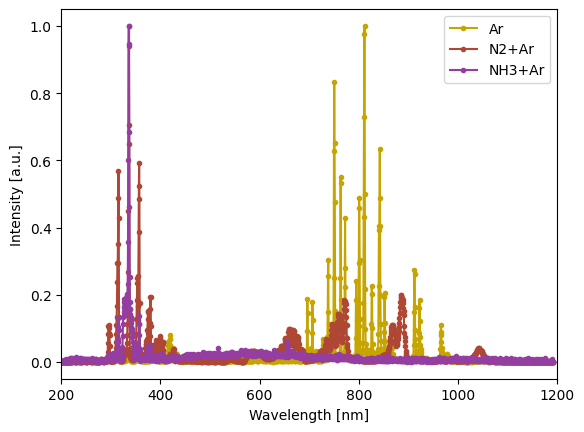

In [30]:
plt.plot(Ar.index.tolist(), Ar_scaled, '.-', color=colors[0])
plt.plot(N2.index.tolist(), N2_scaled, '.-', color=colors[1])
plt.plot(NH3.index.tolist(), NH3_scaled, '.-',color=colors[3])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
# plt.title('Emission spectrum of NH3+Ar')
plt.xlim(200,1200)
plt.legend(['Ar','N2+Ar','NH3+Ar'])
# plt.savefig('file/plasma/NH3+Ar.png')
plt.show()

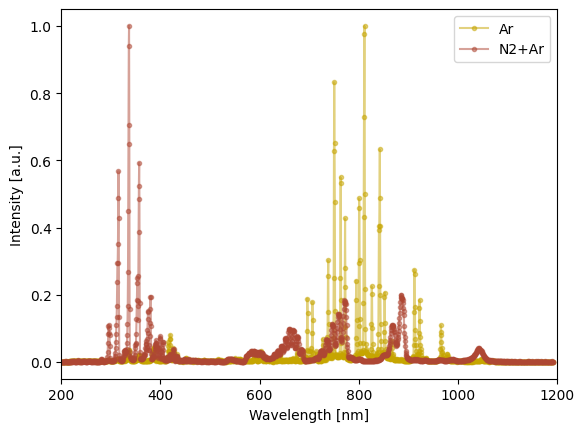

In [24]:
plt.plot(Ar.index.tolist(), Ar_scaled, '.-', alpha=0.5, color=colors[0])
plt.plot(N2.index.tolist(), N2_scaled, '.-', alpha=0.5, color=colors[1])
# plt.plot(NH3.index.tolist(), NH3_scaled, '.-',color='green')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
# plt.title('Emission spectrum of NH3+Ar')
plt.xlim(200,1200)
plt.legend(['Ar','N2+Ar'])
# plt.savefig('file/plasma/NH3+Ar.png')
plt.show()

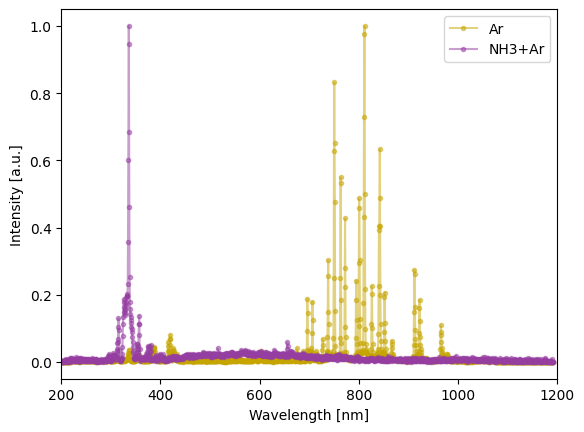

In [26]:
plt.plot(Ar.index.tolist(), Ar_scaled, '.-', alpha=0.5, color=colors[0])
# plt.plot(N2.index.tolist(), N2_scaled, '.-', color='orange')
plt.plot(NH3.index.tolist(), NH3_scaled, '.-',color=colors[3], alpha=0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
# plt.title('Emission spectrum of NH3+Ar')
plt.xlim(200,1200)
plt.legend(['Ar','NH3+Ar'])
# plt.savefig('file/plasma/NH3+Ar.png')
plt.show()

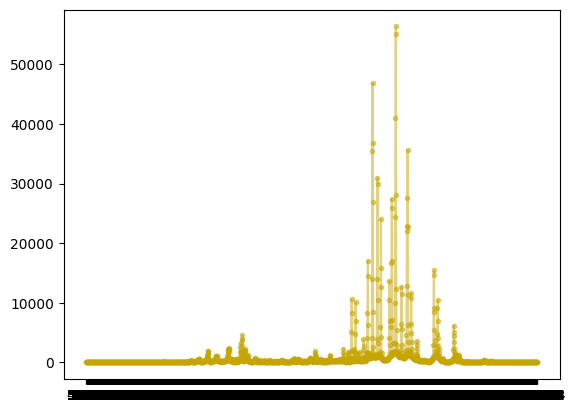

In [53]:
plt.plot(Ar.index.tolist(), Ar, '.-', alpha=0.5, color=colors[0])

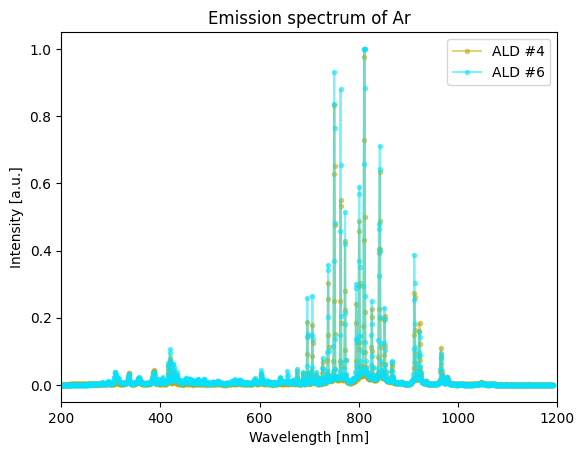

In [85]:
plt.plot(Ar.index.tolist(), Ar_scaled, '.-', alpha=0.5, color=colors[0])
plt.plot(Ar.index.tolist(), Ar_6_scaled, '.-', alpha=0.5, color=colors[5])
# plt.plot(NH3.index.tolist(), NH3_scaled, '.-',color='green')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of Ar')
plt.xlim(200,1200)
plt.legend(['ALD #4','ALD #6'])
plt.savefig('file/plasma/Ar_46.png')
plt.show()

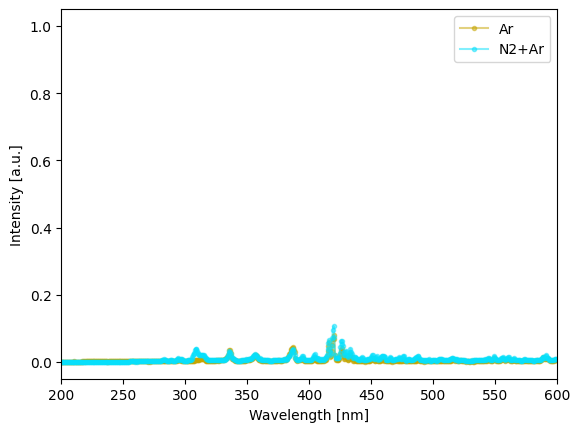

In [81]:
plt.plot(Ar.index.tolist(), Ar_scaled, '.-', alpha=0.5, color=colors[0])
plt.plot(Ar.index.tolist(), Ar_6_scaled, '.-', alpha=0.5, color=colors[5])
# plt.plot(NH3.index.tolist(), NH3_scaled, '.-',color='green')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
# plt.title('Emission spectrum of NH3+Ar')
plt.xlim(200,600)
plt.legend(['Ar','N2+Ar'])
# plt.savefig('file/plasma/NH3+Ar.png')
plt.show()

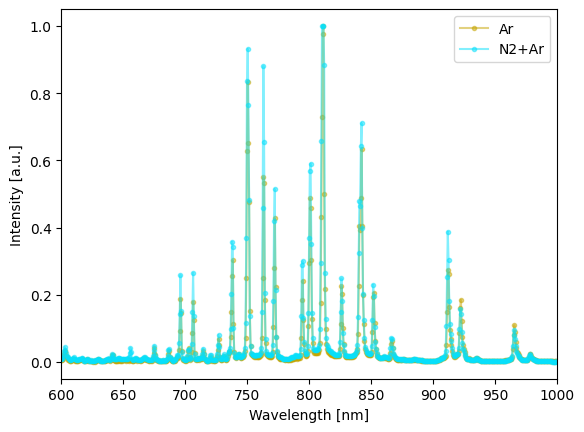

In [82]:
plt.plot(Ar.index.tolist(), Ar_scaled, '.-', alpha=0.5, color=colors[0])
plt.plot(Ar.index.tolist(), Ar_6_scaled, '.-', alpha=0.5, color=colors[5])
# plt.plot(NH3.index.tolist(), NH3_scaled, '.-',color='green')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
# plt.title('Emission spectrum of NH3+Ar')
plt.xlim(600,1000)
plt.legend(['Ar','N2+Ar'])
# plt.savefig('file/plasma/NH3+Ar.png')
plt.show()

In [84]:
# two interactive plots
# make them interactive
import plotly.graph_objects as go

y1 = Ar_scaled
y2 = Ar_6_scaled
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y1, mode='lines+markers', name='ALD #4'), 
                       go.Scatter(x=x, y=y2, mode='lines+markers', name='ALD #6')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[-0.1,2], xaxis_title='Wavelegnth [nm]', 
                  yaxis_title='Intensity [a.u.]', title='Comparison of emission spectra of Ar')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)

#1
scatter1 = fig.data[0]
cust_color1 = colors[0]
scatter1.line.color = cust_color1
scatter1.marker.color = [cust_color1] * len(x)
scatter1.marker.size = [4] * len(x)
scatter1.marker.line.color = [cust_color1] * len(x)
scatter1.marker.line.width = [1] * len(x)
#2
scatter2 = fig.data[1]
cust_color2 = colors[5]
scatter2.line.color = cust_color2
scatter2.marker.color = [cust_color2] * len(x)
scatter2.marker.size = [4] * len(x)
scatter2.marker.line.color = [cust_color2] * len(x)
scatter2.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    #1
    c1 = list(scatter1.marker.color)
    s1 = list(scatter1.marker.size)
    for i in points.point_inds:
        c1[i] = colors[2]
        s1[i] = 10
        with fig.batch_update():
            scatter1.marker.color = c1
            scatter1.marker.size = s1
    #2
    c2 = list(scatter2.marker.color)
    s2 = list(scatter2.marker.size)
    for j in points.point_inds:
        c2[j] = colors[3]
        s2[j] = 10
        with fig.batch_update():
            scatter2.marker.color = c2
            scatter2.marker.size = s2
            
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
    
def display_value(trace, points, selector):
    for point in points.point_inds:
        print(point)
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{np.round(x_value,3)}</b>", ax=0, ay=-25, font=dict(size=10))       
def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
# scatter1.on_click(wrapper)
scatter2.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#C6A500'},
              'marker': {'color': [#C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500, #C6A500, #C6A500,
                                   #C6A500, #C6A500, #C6A500],
                         'line': {'color': [#C6A500, #C6A500, #C6A500, #C6A500,
                                            #C6A500, #C6A500, #C6A500, #C6A500,
                                            #C6A500, #C6A500, #C6A500, #C6A500,
                                            #C6A500, #C6A500, #C6A500, #C6A500

In [70]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='wavelength[nm]')
df_clicked.to_csv('file/plasma/peaks_Ar_46.csv', index=False)

In [87]:
Ar46 = pd.read_csv('file/plasma/peaks_Ar_46.csv')
Ar46.head()

,wavelength[nm],intensity [a.u.]
0,282.47,0.007355
1,288.81,0.006298
2,308.96,0.039837
3,407.14,0.012889
4,437.01,0.014816


In [90]:
from tabulate import tabulate
# create header
head = ['Ar_diff', 'wavelength[nm]']

# display table
print(tabulate(np.array(Ar46['wavelength[nm]'].values).reshape(-1,1), headers=head, tablefmt="grid")) # showindex="always"

+-----------+
|   Ar_diff |
+===========+
|    282.47 |
+-----------+
|    288.81 |
+-----------+
|    308.96 |
+-----------+
|    407.14 |
+-----------+
|    437.01 |
+-----------+
|    442.46 |
+-----------+
|    447.37 |
+-----------+
|    465.41 |
+-----------+
|    472.53 |
+-----------+
|    476.37 |
+-----------+
|    480.21 |
+-----------+
|    487.9  |
+-----------+
|    496.16 |
+-----------+
|    655.78 |
+-----------+


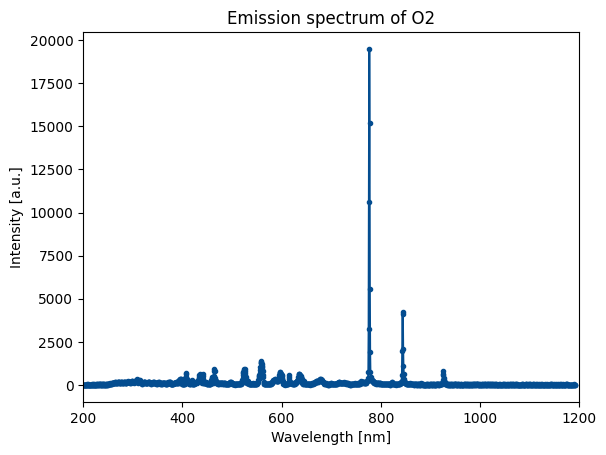

In [72]:
O2.index = [float(x) for x in O2.index.tolist()]
plt.plot(O2.index.tolist(), O2.values, '.-', color=colors[7])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Emission spectrum of O2')
plt.xlim(200,1200)
plt.savefig('file/plasma/O2.png')
plt.show()

In [76]:
# make them interactive
x = O2.index
y = O2.values
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Emission spectrum of O2')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
mycolor = colors[7]
scatter.line.color = mycolor
scatter.marker.color = [mycolor] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [mycolor] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#044D90'},
              'marker': {'color': [#044D90, #044D90, #044D90, ..., #044D90,
                                   #044D90, #044D90],
                         'line': {'color': [#044D90, #044D90, #044D90, ...,
                                            #044D90, #044D90, #044D90],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '5e633515-3049-4af9-80d4-f54963dd8ea9',
              'x': array([  49.75,   50.25,   50.75, ..., 1190.62, 1191.23, 1191.84]),
              'y': array([0.        , 0.        , 8.3553719 , ..., 0.        , 0.        ,
                          0.36363636])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Emission spectrum of O2'},
        

In [77]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='wavelength[nm]')
df_clicked.to_csv('file/plasma/peaks_O2.csv', index=False)

In [94]:
peak_O = pd.read_csv('file/plasma/peaks_O2.csv')
peak_O = peak_O.sort_values(by='wavelength[nm]').reset_index(drop=True)
head = ['wavelength[nm]']
# display table
print(tabulate(np.array(peak_O['wavelength[nm]'].values).reshape(-1,1), headers=head, tablefmt="grid")) # showindex="always"

+------------------+
|   wavelength[nm] |
+==================+
|           259.8  |
+------------------+
|           266.11 |
+------------------+
|           271.91 |
+------------------+
|           277.71 |
+------------------+
|           284.58 |
+------------------+
|           291.46 |
+------------------+
|           299.4  |
+------------------+
|           308.96 |
+------------------+
|           313.74 |
+------------------+
|           324.39 |
+------------------+
|           332.92 |
+------------------+
|           342.54 |
+------------------+
|           352.72 |
+------------------+
|           361.3  |
+------------------+
|           374.74 |
+------------------+
|           395.77 |
+------------------+
|           407.14 |
+------------------+
|           418.52 |
+------------------+
|           434.83 |
+------------------+
|           441.37 |
+------------------+
|           458.84 |
+------------------+
|           464.86 |
+------------------+
|           4